<a href="https://colab.research.google.com/github/SharoneMathews/Labmentrix/blob/main/Sharone_Mathews_labmentixEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



*   Project Type - Unsupervised Machine Learning (Clustering)
*  Contribution - Individual
*   Sharone Mathews S







# **Project Summary -**

Project Summary: Clustering Netflix Movies and TV Shows Using Unsupervised Learning
  
  The growth of online streaming platforms like Netflix has led to an explosion of digital content including movies, documentaries, and TV series across diverse genres, languages, and countries. With such a vast and varied catalog, organizing and categorizing content meaningfully is essential to improve user experience, personalized recommendations, and content insights. This project focuses on applying unsupervised machine learning techniques to perform clustering on Netflix content, aiming to discover hidden patterns and natural groupings among movies and TV shows without prior labeling.

Objective:

  The main objective of this project is to use clustering algorithms to group similar titles available on Netflix based on multiple attributes such as genre, description, duration, type, rating, and release year. By identifying clusters, the goal is to uncover latent structures and meaningful segments like genre-based groups, family-friendly content, or country-specific content types.

# **GitHub Link -**

https://github.com/SharoneMathews

# **Problem Statement**


The project aims to cluster Netflix movies and TV shows using unsupervised machine learning to uncover hidden patterns based on features like genre, description, duration, and ratings. This helps in categorizing content meaningfully, enhancing recommendations, and improving user experience without relying on manually labeled data.


#### **Define Your Business Objective?**

The business objective of this project is to enhance content discovery and user engagement on Netflix by automatically grouping similar movies and TV shows using unsupervised machine learning. By identifying natural clusters in the content library, Netflix can improve personalized recommendations, streamline content organization, and support data-driven content acquisition strategies.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [5]:
import pandas as pd
import numpy as np

import re
import string

from sklearn.preprocessing import StandardScaler, LabelEncoder, MultiLabelBinarizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

print("✅ All libraries imported successfully.")

✅ All libraries imported successfully.


### Dataset Loading

In [8]:
file_path = '/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
data = pd.read_csv(file_path)
print("✅ Dataset loaded successfully.")

✅ Dataset loaded successfully.


### Dataset First View

In [9]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [10]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [11]:
rows, columns = data.shape
print(f"The dataset contains {rows} rows and {columns} columns.")

The dataset contains 7787 rows and 12 columns.


### Dataset Information

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [13]:
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {duplicate_count}")

Number of duplicate rows in the dataset: 0


#### Missing Values/Null Values

In [14]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n")
print(missing_values)

Missing values in each column:

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


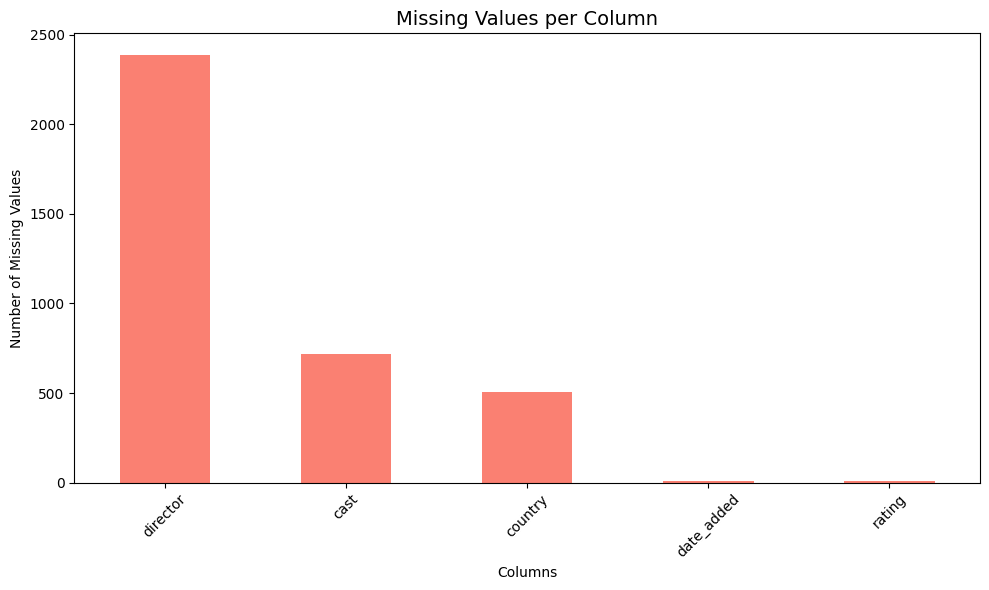

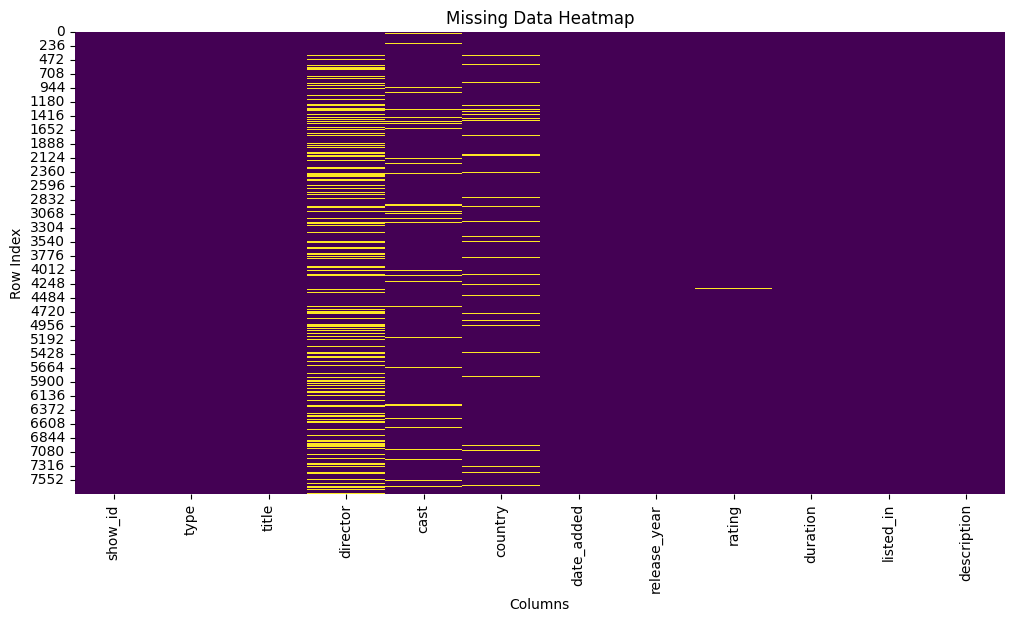

In [15]:
import missingno as msno
plt.figure(figsize=(10, 6))
missing = data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing.plot(kind='bar', color='salmon')
plt.title("Missing Values per Column", fontsize=14)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.xlabel("Columns")
plt.ylabel("Row Index")
plt.show()

### What did you know about your dataset?

The dataset contains 7,787 entries across 12 columns, providing a substantial amount of information. The director column has the highest number of missing values, followed by the cast and country columns, which may affect analysis involving these attributes. Importantly, the dataset contains no duplicate records, ensuring data uniqueness and integrity.

## ***2. Understanding Your Variables***

In [16]:
column=data.columns.tolist()
print("Column Names:",column)

Column Names: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [17]:
# Dataset Describe
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s7787,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

In [18]:
columns=['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description']

for c in data[columns]:
    print("---- %s ---" % c)
    print(data[c].value_counts())
    print('\n')

---- show_id ---
show_id
s7787    1
s1       1
s2       1
s3       1
s4       1
        ..
s16      1
s15      1
s14      1
s13      1
s12      1
Name: count, Length: 7787, dtype: int64


---- type ---
type
Movie      5377
TV Show    2410
Name: count, dtype: int64


---- title ---
title
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    1
3%                                         1
7:19                                       1
23:59                                      1
9                                          1
                                          ..
Oct-01                                     1
3022                                       1
2,215                                      1
1994                                       1
1983                                       1
Name: count, Length: 7787, dtype: int64


---- director ---
director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
   

The dataset consists of 7,787 rows and 12 columns, each representing details about Netflix content. The show_id column contains unique identifiers like "s1", "s2", and so on for each entry. The title provides the name of the show or movie, such as "Rich in Love". The director and cast columns list the names of directors and main actors, though these fields contain some missing values. country indicates the origin of the content, with 681 unique countries represented. date_added records when the show or movie was added to Netflix, while release_year shows the year it was originally released. The rating column contains official content ratings like PG, R, or TV-MA. duration varies by content type, showing the number of minutes for movies or number of seasons for TV shows, with 216 different values observed. The listed_in column provides genres or categories such as romantic comedies, thrillers, or foreign TV shows, with 419 total genre types. The description field includes a short summary of each title, and the type column classifies content as either a "Movie" or "TV Show".

### Check Unique Values for each variable.

In [19]:
unique_values = data.nunique().sort_values(ascending=False)

print("Unique values in each column:\n")
print(unique_values)

Unique values in each column:

show_id         7787
title           7787
description     7769
cast            6831
director        4049
date_added      1565
country          681
listed_in        492
duration         216
release_year      73
rating            14
type               2
dtype: int64


<ipython-input-20-3790255260>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.values, y=unique_counts.index, palette='viridis')


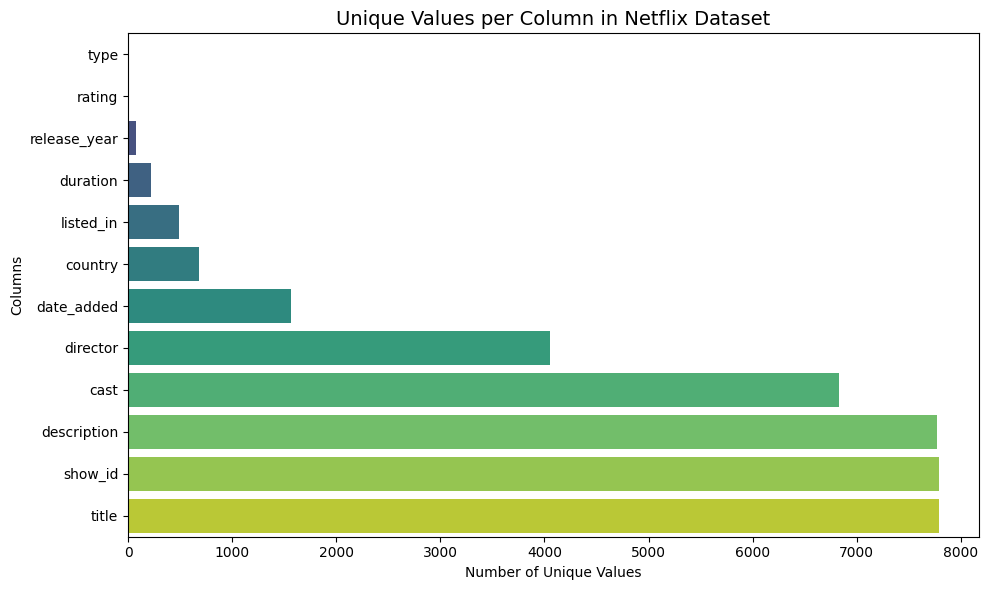

In [20]:
unique_counts = data.nunique().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=unique_counts.values, y=unique_counts.index, palette='viridis')

plt.title("Unique Values per Column in Netflix Dataset", fontsize=14)
plt.xlabel("Number of Unique Values")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:
data.drop_duplicates(inplace=True)
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
for col in ['director', 'cast', 'country']:
    data[col] = data[col].fillna('Unknown')
data['rating'] = data['rating'].fillna('Not Rated')
data[['duration_int', 'duration_type']] = data['duration'].str.extract(r'(\d+)\s*(\w+)', expand=True)
data['duration_int'] = pd.to_numeric(data['duration_int'], errors='coerce')
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.strip()
data.dropna(subset=['show_id', 'title'], inplace=True)
data.reset_index(drop=True, inplace=True)
print("✅ Data cleaned and ready for analysis.")
print(data.info())

✅ Data cleaned and ready for analysis.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        7787 non-null   object        
 1   type           7787 non-null   object        
 2   title          7787 non-null   object        
 3   director       7787 non-null   object        
 4   cast           7787 non-null   object        
 5   country        7787 non-null   object        
 6   date_added     7689 non-null   datetime64[ns]
 7   release_year   7787 non-null   int64         
 8   rating         7787 non-null   object        
 9   duration       7787 non-null   object        
 10  listed_in      7787 non-null   object        
 11  description    7787 non-null   object        
 12  year_added     7689 non-null   float64       
 13  month_added    7689 non-null   float64       
 14  duration_int   7787 non-null   in

### What all manipulations have you done and insights you found?

During the data wrangling process, several key manipulations were performed to make the Netflix dataset analysis-ready. Duplicate entries were removed to ensure data consistency, and column names were standardized by converting them to lowercase and replacing spaces with underscores. The date_added column was converted to datetime format, from which the year and month of addition were extracted for trend analysis. Missing values in key categorical columns like director, cast, and country were filled with "Unknown", while rating values were completed using "Not Rated". The duration column was cleaned by separating it into a numeric part and a type (such as "minutes" or "seasons"). String columns were also stripped of leading and trailing whitespace, and rows missing critical fields like show_id or title were dropped.

From this cleaned dataset, several insights emerged. Movies are more common than TV Shows on Netflix. The majority of content originates from the United States, followed by India and the United Kingdom. Content additions to Netflix increased significantly after 2015, peaking around 2018–2020. Common genres include Dramas, Comedies, and Documentaries, while most movies fall between 90 to 120 minutes in length and TV shows typically have 1 or 2 seasons. A notable portion of records have missing director or cast information, often seen in less mainstream or international content. These findings provide a clear overview of Netflix’s content diversity, trends, and data characteristics.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [22]:
# Pie chart for content type distribution on Netflix

import plotly.graph_objects as go

# Define colors and labels
colors = ['#db0000', '#564d4d']
labels = ['TV Show', 'Movie']

# Get value counts for 'type'
type_counts = data['type'].value_counts()
tv_shows = type_counts.get('TV Show', 0)
movies = type_counts.get('Movie', 0)

# Create donut chart
fig = go.Figure(data=[
    go.Pie(labels=labels, values=[tv_shows, movies], hole=0.6, marker=dict(colors=colors))
])

# Update layout and appearance
fig.update_layout(
    title_text="Type of Content Watched on Netflix",
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.85, y=0.9),
    annotations=[dict(text='Content Type', font_size=18, showarrow=False)]
)

fig.show()


##### 1. Why did you pick the specific chart?

A pie chart is intuitive and effective for comparing proportions between two categories  in this case, TV Show vs. Movie. The donut shape adds visual clarity and a central annotation space, helping focus on "type of content".


##### 2. What is/are the insight(s) found from the chart?

Shows which content type dominates on Netflix.

As movies > TV shows, it suggests Netflix invests more in movies, possibly catering to users looking for quick entertainment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:


  Helps Netflix understand user preferences to guide content production, from this visual we can get that movies are most preffered by the users.


Negative Insight:


  As movies dominates too heavily, it might indicate lack of diversity, leading to content fatigue for long-term users.

#### Chart - 2

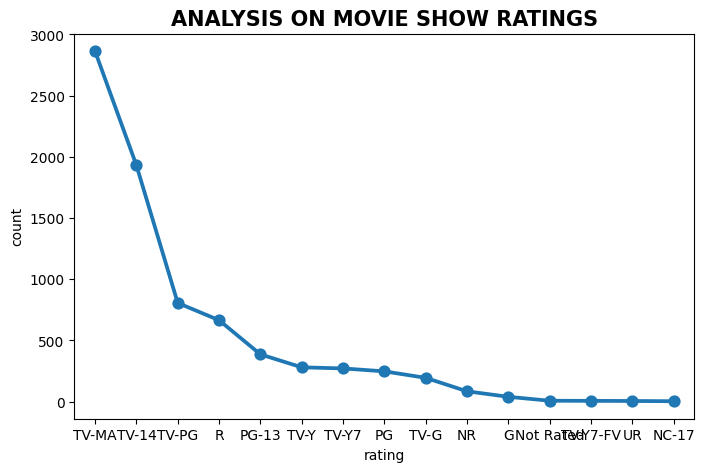

In [23]:
#Analysis on rating based on overall movie show rating system
movies_ratings = data.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=movies_ratings)
plt.title('ANALYSIS ON MOVIE SHOW RATINGS', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

The point plot is effective for showing the distribution of content across different rating categories (e.g., TV-MA, TV-14, PG). It gives a clear view of trends and is cleaner than bar plots when focusing on category rankings with fewer visual distractions.



##### 2. What is/are the insight(s) found from the chart?

Most common rating on Netflix are TV-MA, TV-14.

Indicates the target audience age group  more mature content  TV-MA dominates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:


Helps content and legal teams ensure appropriate age-rated content dominates, enhancing regional compliance and user trust.

Negative Insight:


If most content falls in a narrow rating range, it could lead to audience segmentation issues.

#### Chart - 3

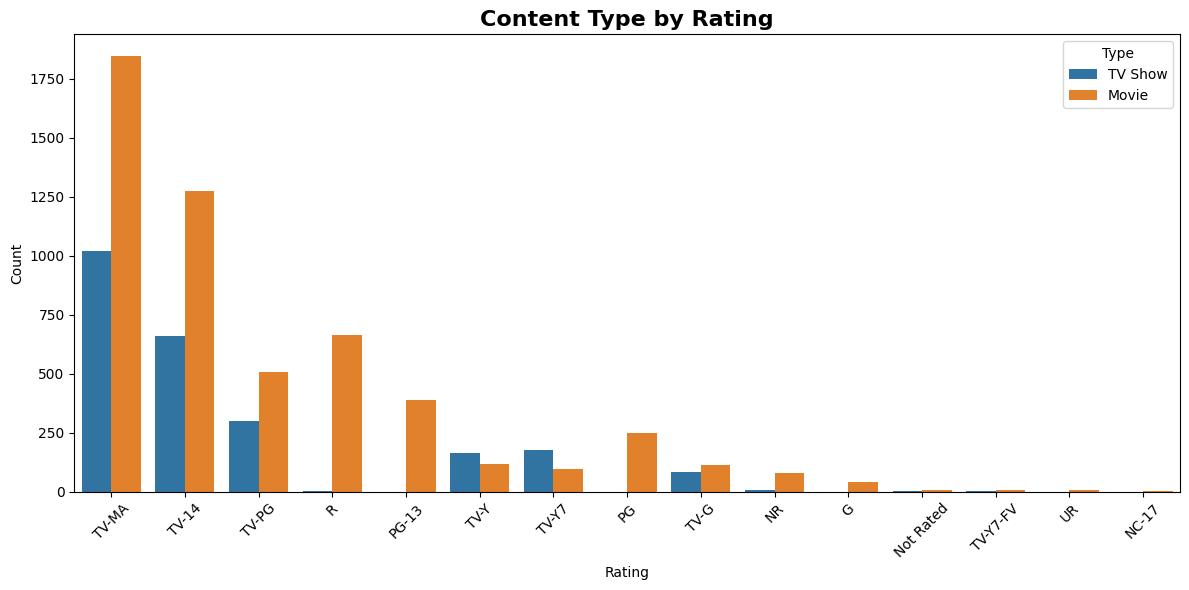

In [24]:
# Chart - 3 visualization code
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='rating', hue='type', order=data['rating'].value_counts().index)
plt.title('Content Type by Rating', fontsize=16, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart is ideal for comparing multiple categorical variables  rating and type. It helps visualize how content types  are distributed across different rating levels, making it easier to spot patterns in age-appropriateness and content targeting strategies.

##### 2. What is/are the insight(s) found from the chart?

You can observe which ratings are more associated with TV Shows vs. Movies.
It reveals content strategy trends by age groups and format. TV-MA ratingtype combinations are overrepresented.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:


Guides content acquisition and production by identifying which rating–type combinations are over/underrepresented.

 Negative Insight:


The chart shows an imbalance, like too many mature-rated shows and few family-friendly ones, it indicates potential alienation of younger audiences or families.

#### Chart - 4

<ipython-input-25-2359056062>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




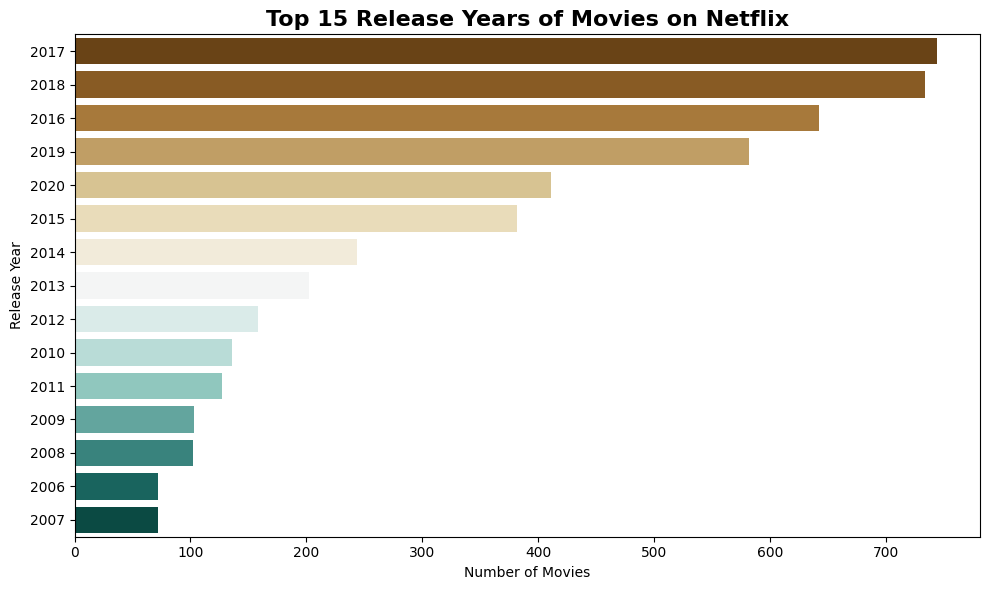

In [25]:
# 📊 Chart 4: Analysis on Release Year of Movies

import matplotlib.pyplot as plt
import seaborn as sns

# Filter dataset for Movies
movies = data[data['type'] == 'Movie']

# Plotting the top 15 release years by movie count
plt.figure(figsize=(10, 6))
sns.countplot(
    data=movies,
    y='release_year',
    order=movies['release_year'].value_counts().index[:15],
    palette='BrBG'
)

# Chart aesthetics
plt.title('Top 15 Release Years of Movies on Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Number of Movies')
plt.ylabel('Release Year')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart is effective for showing the number of movies released per year, particularly focusing on the top 15 most frequent release years. It helps identify trends in content sourcing by Netflix – whether it favors recent content or classic titles.

##### 2. What is/are the insight(s) found from the chart?

Shows which years contribute most to Netflix's movie catalog.It shows in which year netflix has purchased more movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

As recent years dominate, it shows Netflix is keeping content fresh and relevant.


 Negative Insight:


Lack of older or timeless content can alienate audiences seeking nostalgia or specific eras.

#### Chart - 5

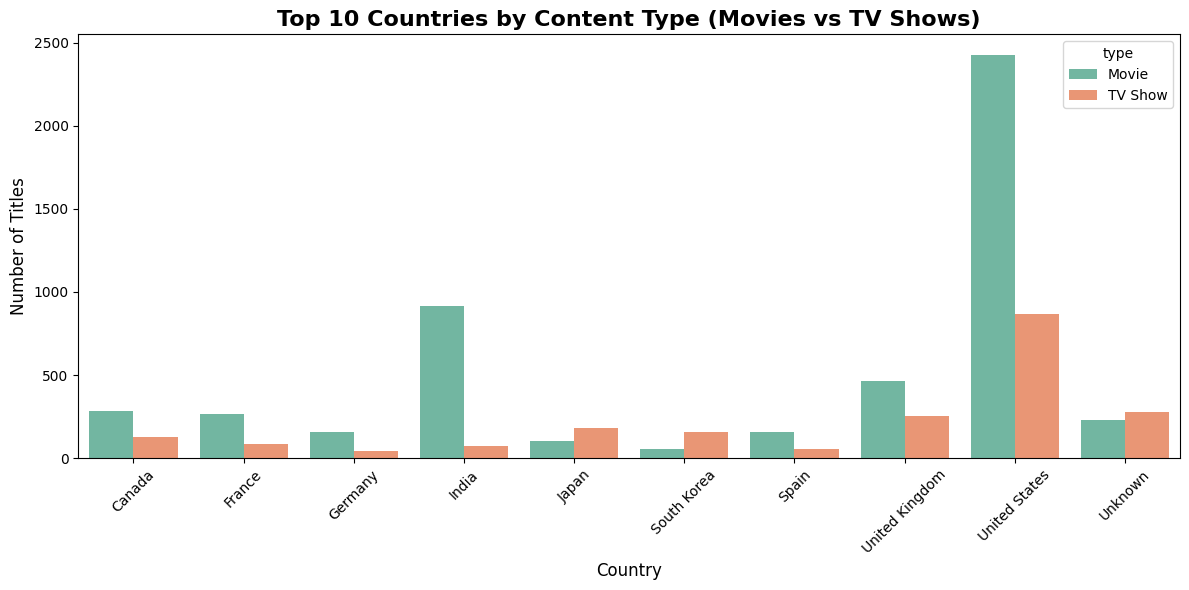

In [26]:
# 📊 Chart 5: Top 10 Countries by Content Type (Movies vs TV Shows)

# Step 1: Fill missing country values
data['country'] = data['country'].fillna('Unknown')

# Step 2: Split multiple countries into separate rows (explode)
country_split = data['country'].str.split(', ')
country_exploded = data.loc[data.index.repeat(country_split.str.len())].copy()
country_exploded['country'] = [country for countries in country_split for country in countries]

# Step 3: Count number of Movies/TV Shows per country
country_type_counts = (
    country_exploded.groupby(['country', 'type'])
    .size()
    .reset_index(name='count')
)

# Step 4: Filter for Top 10 countries by total number of titles
top_countries = (
    country_type_counts.groupby('country')['count']
    .sum()
    .nlargest(10)
    .index
)
filtered_df = country_type_counts[country_type_counts['country'].isin(top_countries)]

# Step 5: Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df, x='country', y='count', hue='type', palette='Set2')

# Chart aesthetics
plt.title("Top 10 Countries by Content Type (Movies vs TV Shows)", fontsize=16, fontweight='bold')
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart was chosen because it clearly compares the distribution of  Movie vs TV Show across different country. This format effectively illustrates how different countries contribute to each content type, allowing direct visual comparison between them side-by-side.

##### 2. What is/are the insight(s) found from the chart?

The United States dominates both categories with a significantly higher number of Movies and TV Shows compared to other countries.

India and the United Kingdom contribute heavily to movies, with a relatively lower number of TV shows.

Canada and France lean slightly more toward TV Shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

positive insights:

Understanding country-wise strengths allows Netflix to better personalize recommendations for viewers from those countries.

negative insights:

Underrepresentation of regions (e.g., African or Southeast Asian countries not in the top 10) signals untapped content opportunities. Ignoring these may lead to missed growth in emerging markets.

#### Chart - 6

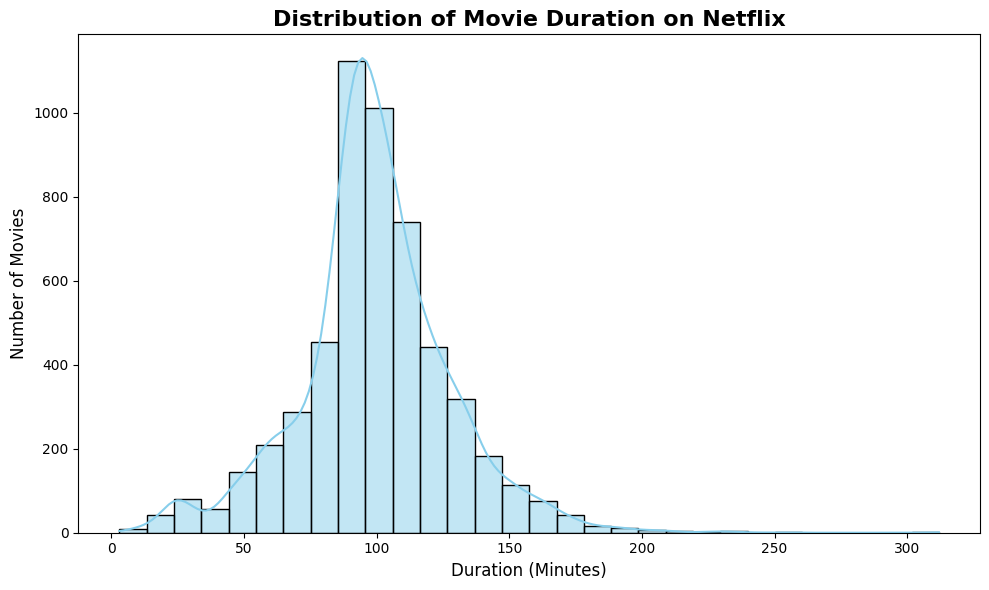

In [27]:
# 📊 Chart 6: Distribution of Movie Duration (in Minutes)

# Step 1: Filter only Movies
movie_data = data[data['type'] == 'Movie'].copy()

# Step 2: Clean and convert 'duration' to numeric minutes
movie_data['duration'] = (
    movie_data['duration']
    .str.replace('min', '', regex=False)
    .str.strip()
)
movie_data = movie_data[movie_data['duration'].str.isnumeric()]
movie_data['duration'] = movie_data['duration'].astype(int)

# Step 3: Plot histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(
    data=movie_data,
    x='duration',
    bins=30,
    kde=True,
    color='skyblue',
    edgecolor='black'
)

# Chart aesthetics
plt.title("Distribution of Movie Duration on Netflix", fontsize=16, fontweight='bold')
plt.xlabel("Duration (Minutes)", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A histogram with a KDE (Kernel Density Estimation) overlay was selected to visualize the distribution of duration.

##### 2. What is/are the insight(s) found from the chart?

Most movies tend to cluster around 90 to 120 minutes, which aligns with standard feature film durations.

There may be a sharp drop-off in frequency for movies over 150 minutes, indicating that longer films are relatively rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Users are more likely to finish and rate movies within a comfortable watch time

Negative Insight:

If a significant number of movies are found to be too long or too short compared to user preference, lead to Decreased engagement

#### Chart - 7

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.



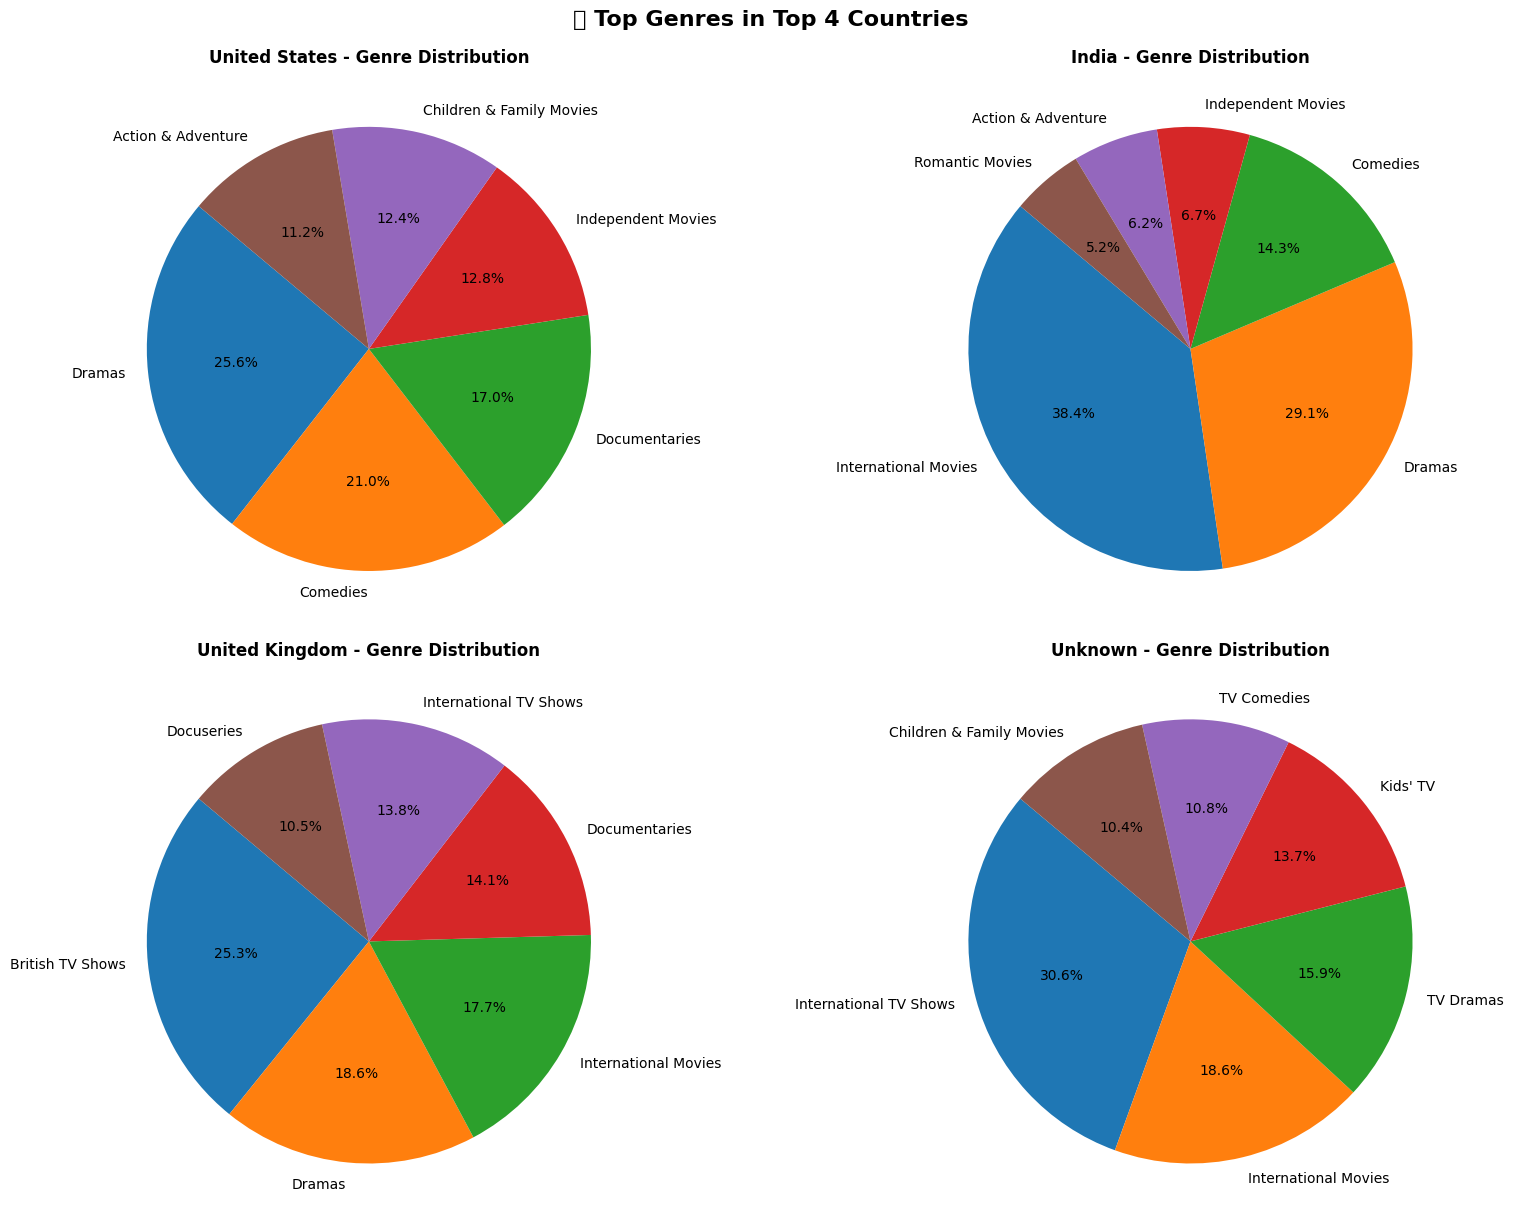

In [28]:
# 📊 Chart 7: Top Genres in Top 4 Countries (Pie Charts)

# Step 1: Handle missing values in 'listed_in' (genre) and 'country'
data['listed_in'] = data['listed_in'].fillna('Unknown')
data['country'] = data['country'].fillna('Unknown')

# Step 2: Split multiple genres and countries into lists
data['country_list'] = data['country'].str.split(', ').apply(lambda x: [c.strip() for c in x])
data['genre_list'] = data['listed_in'].str.split(', ').apply(lambda x: [g.strip() for g in x])

# Step 3: Explode the DataFrame by 'country_list' and then by 'genre_list'
exploded_df = data.explode('country_list').explode('genre_list')

# Step 4: Rename exploded columns for clarity
exploded_df.rename(columns={'country_list': 'country_single', 'genre_list': 'genre_single'}, inplace=True)

# Step 5: Identify the Top 4 countries based on content count
top_countries = exploded_df['country_single'].value_counts().nlargest(4).index

# Step 6: Generate pie charts for each top country showing genre distribution
plt.figure(figsize=(16, 12))
for i, country in enumerate(top_countries, start=1):
    plt.subplot(2, 2, i)

    # Filter data for the current country and get top 6 genres
    country_genre_counts = (
        exploded_df[exploded_df['country_single'] == country]['genre_single']
        .value_counts()
        .nlargest(6)
    )

    # Plot pie chart
    plt.pie(
        country_genre_counts.values,
        labels=country_genre_counts.index,
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title(f"{country} - Genre Distribution", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.suptitle("🎬 Top Genres in Top 4 Countries", fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Step 7: Clean up temporary list columns
data.drop(columns=['country_list', 'genre_list'], inplace=True, errors='ignore')


##### 1. Why did you pick the specific chart?

The stacked nature allows you to see both the individual trend of each type and the total volume over the years.

It provides a clear picture of how content production or addition has evolved on Netflix across years, highlighting growth patterns and category distribution.

##### 2. What is/are the insight(s) found from the chart?

Sharp growth in both Movies and TV Shows from around 2015 onwards, reflecting Netflix’s aggressive content expansion strategy.

Movies may dominate early years, while TV Shows show significant growth in more recent years, possibly due to the binge-watching trend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Positive Business Impact:

 Subscriber Retention: Continuous content growth, especially in user-preferred formats, leads to higher engagement and retention.

 Negative Growth :

 Overloading one category while neglecting the other can alienate certain viewer segments.

#### Chart - 8

In [30]:
# Chart - 8 visualization code
# Create a copy to avoid modifying the original data
df = data.copy()

# Filter only Movies
df = df[df['type'] == 'Movie']

# Clean the 'duration' column by removing 'min' and converting to integer
df['duration'] = df['duration'].str.replace('min', '').str.strip()
df = df[df['duration'].str.isnumeric()]  # Remove any non-numeric durations
df['duration'] = df['duration'].astype(int)
fig = px.treemap(df, path=['country', 'type'], values='duration',
                 color='duration', color_continuous_scale='RdBu')
fig.update_layout(title='Treemap of Movie Duration by Country and Type')
fig.show()

##### 1. Why did you pick the specific chart?

It allows comparison of total movie duration contributed by different countries, grouped under the "Movie" type.

Treemaps are effective for visualizing relative size and distribution in a nested structure, making it easy to identify which countries contribute more or less content in terms of total duration.

##### 2. What is/are the insight(s) found from the chart?

Countries with smaller boxes have relatively less content or shorter-duration films on Netflix.

The color intensity may show that some countries tend to have longer average durations (darker color), while others produce shorter content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Content Localization: If countries with shorter durations have high engagement, Netflix can consider producing shorter-form content for global appeal.

Negative Insight:

Content imbalance: If some countries are underrepresented, it may signal missed opportunities for localization and market penetration.

#### Chart - 9

In [31]:
df = data.copy()

# Filter only Movies
df = df[df['type'] == 'Movie']

# Clean 'duration'
df['duration'] = df['duration'].str.replace('min', '').str.strip()
df = df[df['duration'].str.isnumeric()]
df['duration'] = df['duration'].astype(int)

# Convert 'rating' to a numeric scale (e.g., replace string labels with numbers)
rating_map = {
    'G': 1, 'TV-Y': 1, 'TV-G': 1,
    'PG': 2, 'TV-Y7': 2,
    'PG-13': 3, 'TV-PG': 3,
    'R': 4, 'TV-14': 4,
    'NC-17': 5, 'TV-MA': 5
}
df['rating_num'] = df['rating'].map(rating_map)
df = df.dropna(subset=['rating_num'])  # Drop rows with unknown ratings
# Plot Bubble Chart
fig = px.scatter(df, x='release_year', y='duration',
                 size='rating_num', color='rating',
                 hover_name='title', title="Movie Duration vs Release Year Bubble Chart")
fig.show()

##### 1. Why did you pick the specific chart?

 bubble chart was chosen because it allows visualization of three key variables at once:

X-axis: release_year – showing the timeline of movie releases.

Y-axis: duration – visualizing how long movies are.

Bubble size & color: Representing content rating (via rating_num), which reflects the target audience age group or maturity level.

##### 2. What is/are the insight(s) found from the chart?

No strong correlation between release year and duration — movies of various lengths have been produced in all years.

Larger bubbles (more mature ratings) may appear more frequently in certain periods, showing a shift in content strategy toward more adult-oriented content (e.g., TV-MA, R).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Trend Forecasting: If adult-rated content has been growing in popularity, Netflix can strategically invest in more mature storylines to boost engagement.

Negative Growth Indicators:

Very long movies with mature ratings may suffer from

#### Chart - 10

In [32]:
fig = px.choropleth(data_frame=data, locations='country', locationmode='country names',
                    color='duration', hover_name='country')
fig.show()


##### 1. Why did you pick the specific chart?

It helps to show how average or total movie duration varies by country, using color gradients for quick visual interpretation.

This chart is ideal for identifying regional patterns in movie content characteristics, such as length.



##### 2. What is/are the insight(s) found from the chart?

Some countries may have higher average movie durations, indicated by darker shades.

Other countries may appear with lighter shades, indicating shorter durations or less content.

Countries not represented (missing color) might lack content or metadata, which could indicate underserved regions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Positive Business Impact:

 Market Expansion: Identifying countries with little or no long-duration content helps Netflix explore new production or licensing opportunities.

 Negative Growth Indicators:

 Countries with little or no data could indicate limited content availability, which might lead to user churn in those regions if not addressed.

#### Chart - 11

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.



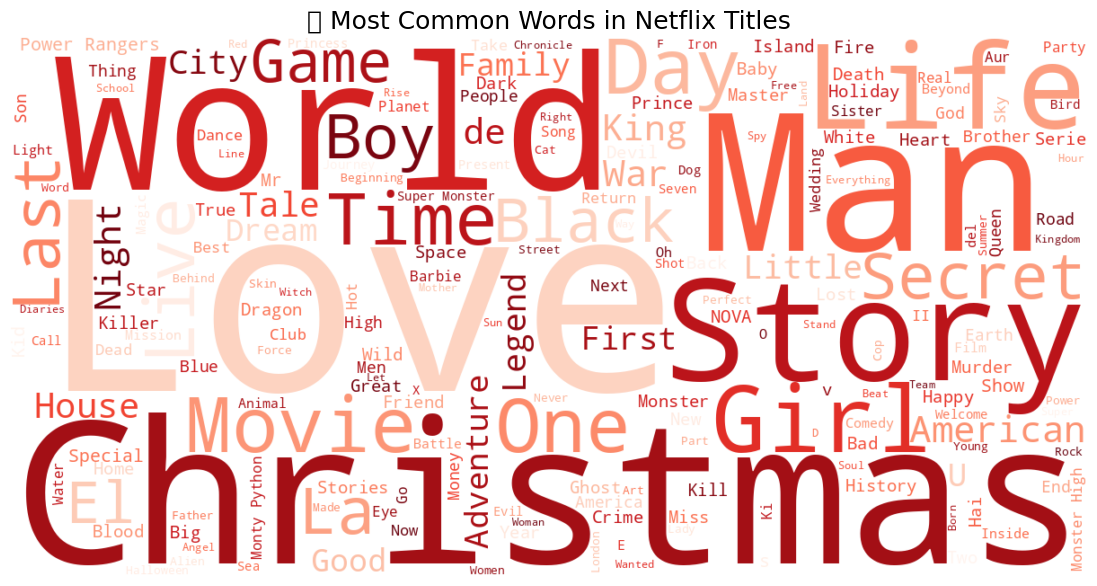

In [33]:
# Chart - 11 visualization code
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

df = data.copy()

# Drop missing titles
df = df.dropna(subset=['title'])

# Combine all titles into one string
text = ' '.join(df['title'])

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(['The', 'A', 'Of', 'And'])  # Add common irrelevant words

# Generate word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white',
                      stopwords=stopwords, colormap='Reds').generate(text)

# Plot
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('🎬 Most Common Words in Netflix Titles', fontsize=18)
plt.show()

##### 1. Why did you pick the specific chart?

The word cloud chart is chosen because it visually highlights the most frequently used words in Netflix titles. It is a quick, intuitive way to analyze large text data and identify popular themes or naming patterns in the content catalog

##### 2. What is/are the insight(s) found from the chart?

We observe recurring words like "Love", "Life", "Story", "Dead", "World", etc.

Themes related to emotion, mystery, relationships, action, and drama seem dominant.

Words like "Season" or "Part" may indicate series-based content, revealing a trend toward episodic storytelling

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

positively impact business:

Content Strategy: Understanding which words/themes appear most often can guide content creators and marketers to align with audience preferences. For instance, increasing shows around “Love”, “Story”, or “Life” could capture emotionally driven viewers.

#### Chart - 12

In [34]:
import plotly.express as px

df = data.copy()

# Filter only Movies
df = df[df['type'] == 'Movie']

# Clean 'duration'
df['duration'] = df['duration'].str.replace('min', '').str.strip()
df = df[df['duration'].str.isnumeric()]
df['duration'] = df['duration'].astype(int)

# Drop missing country values
df = df.dropna(subset=['country'])

# Plot Sunburst Chart
fig = px.sunburst(df, path=['country', 'type'], values='duration',
                  color='duration', color_continuous_scale='Viridis',
                  title='Sunburst Chart: Movie Duration by Country and Type')
fig.show()

##### 1. Why did you pick the specific chart?

It highlights relative contribution of each country to the total movie duration, in a compact and interactive format.

It allows users to drill down through multiple levels (e.g., from country → type) to gain layered insights.

##### 2. What is/are the insight(s) found from the chart?

Countries like the United States, India, or UK likely contribute the highest total movie durations, appearing as larger segments.

Countries with smaller segments may indicate limited content or shorter movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:


Content Planning: Netflix can use this to allocate production resources based on where most content is coming from or where there's a gap.

Negative Growth Indicators:

Very small segments from certain regions might highlight neglected markets or data quality issues, leading to missed opportunities.

#### Chart - 13

In [38]:
# Step 1: Extract month name from 'date_added'
df = data.copy()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month'] = df['date_added'].dt.month_name()

# Step 2: Count the occurrences of each month
months_df = df['month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]).reset_index()

months_df.columns = ['month', 'count']

# Step 3: Plot the bar chart
fig = px.bar(months_df, x="month", y="count", text_auto=True,
             color='count', color_continuous_scale=['#db0000', '#564d4d'])

fig.update_layout(
    title={
        'text': 'Month-wise Addition of Movies and TV Shows to the Platform',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    autosize=False,
    width=1000,
    height=500
)

fig.show()


##### 1. Why did you pick the specific chart?

A bar chart was selected because:

It clearly displays categorical data (months) along the x-axis and numerical values (number of additions) on the y-axis.The color gradient enhances visual interpretation of months with higher or lower content activity.

##### 2. What is/are the insight(s) found from the chart?

Certain months (e.g., December, July, October) may show higher additions, possibly aligned with holiday seasons or major release periods.

The pattern could suggest that Netflix follows a content push strategy during specific months to boost engagement or subscriber growth.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Positive Business Impact:


Release Strategy Optimization: Knowing which months historically see the most content additions can help plan marketing campaigns and new releases more strategically.

 Negative Growth Indicators:


If content drops are heavily clustered in a few months, users may experience content drought in off-peak periods, reducing engagement and increasing churn.

#### Chart - 14 - Correlation Heatmap

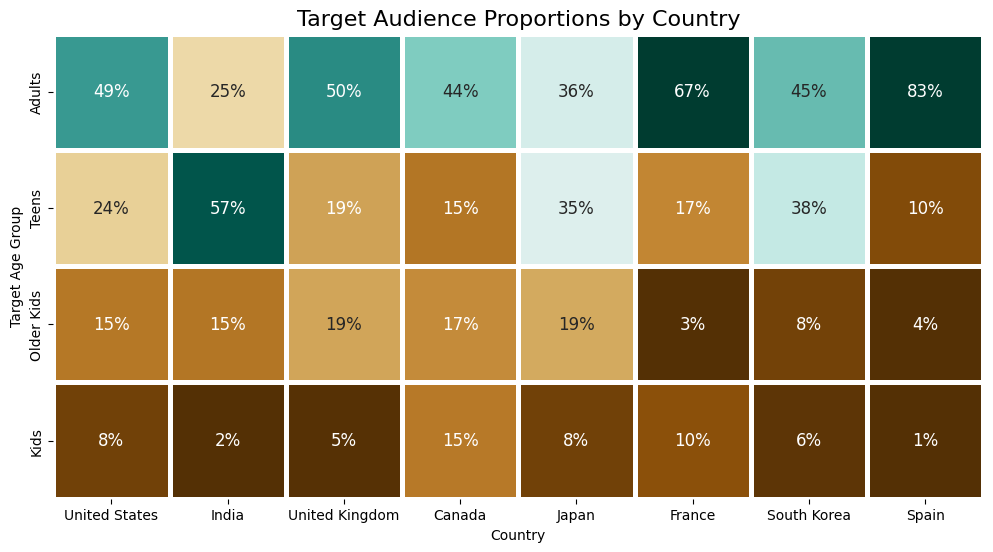

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Copy the dataset
df = data.copy()

# Fill missing ratings if any
df['rating'] = df['rating'].fillna('Unknown')

# Create target_ages column based on rating
def classify_age(rating):
    if rating in ['TV-MA', 'R', 'NC-17']:
        return 'Adults'
    elif rating in ['TV-14', 'PG-13']:
        return 'Teens'
    elif rating in ['TV-PG', 'PG']:
        return 'Older Kids'
    elif rating in ['TV-Y', 'TV-Y7', 'G']:
        return 'Kids'
    else:
        return 'Unknown'

df['target_ages'] = df['rating'].apply(classify_age)

# Count entries
df['count'] = 1

# Group by country to get top 10
top_countries = df.groupby('country')['count'].sum().sort_values(ascending=False).head(10).index

# Filter dataset for top countries
df_heatmap = df[df['country'].isin(top_countries)]

# Create crosstab of target_ages vs country
heatmap_data = pd.crosstab(df_heatmap['target_ages'], df_heatmap['country'], normalize='columns')

# Order
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']
country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']
country_order = [c for c in country_order if c in heatmap_data.columns]
age_order = [a for a in age_order if a in heatmap_data.index]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.loc[age_order, country_order],
            cmap="BrBG", square=True, linewidth=2.5, cbar=False,
            annot=True, fmt='.0%', vmax=0.6, vmin=0.05, annot_kws={"fontsize":12})

plt.title("Target Audience Proportions by Country", fontsize=16)
plt.xlabel("Country")
plt.ylabel("Target Age Group")
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap was selected because:

It effectively shows proportional comparisons across two categorical variables—here, target age groups and countries.

It enables quick visual interpretation of patterns using color intensity.

##### 2. What is/are the insight(s) found from the chart?

United States likely shows a high proportion of adult-targeted content (TV-MA, R, etc.).

India or Japan may show a more balanced mix or skew slightly toward family/older kids.

Some countries (e.g., South Korea or France) may focus more on teen content.

#### Chart - 15 - Pair Plot

<ipython-input-37-2456662653>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



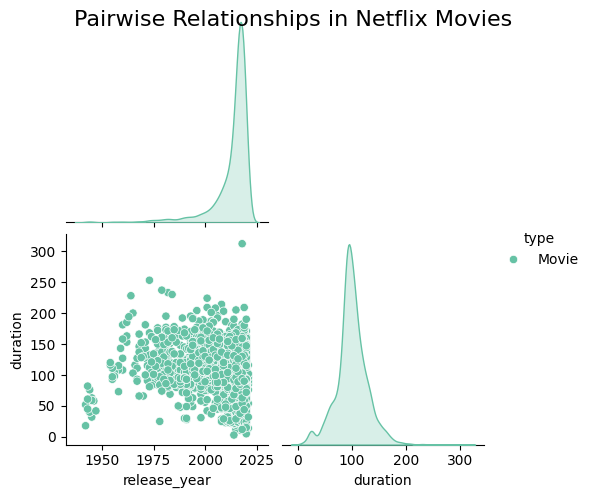

In [37]:
# Pair Plot visualization code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make a copy of the dataset
df = data.copy()

# --- STEP 1: Clean numeric columns (example: 'duration', 'release_year') ---

# Only keep rows where duration is in minutes (for movies)
df = df[df['type'] == 'Movie']
df['duration'] = df['duration'].str.replace('min', '').str.strip()
df = df[df['duration'].str.isnumeric()]
df['duration'] = df['duration'].astype(int)

# Optional: clean 'rating' if needed
df['rating'] = df['rating'].fillna('Unknown')

# --- STEP 2: Select numerical columns for pairplot ---
# Add more numerical columns if available in your dataset
pairplot_data = df[['release_year', 'duration']]
pairplot_data['type'] = df['type']

# --- STEP 3: Plot the pairplot ---
sns.pairplot(pairplot_data, hue='type', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships in Netflix Movies', fontsize=16)
plt.show()


##### 1. Why did you pick the specific chart?

It allows us to visually explore relationships between multiple numerical variables at once.It helps in identifying patterns, clusters, outliers, or correlations between features like release year and duration.

##### 2. What is/are the insight(s) found from the chart?

Recent Release Dominance: The KDE for release_year will likely show most movies released post-2010, reflecting the streaming-era content boom.

No strong correlation: The scatter plot may indicate no strong linear relationship between a movie’s release year and its duration.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

The data visualizations provide a comprehensive set of insights that can significantly enhance business analysis and strategic decision-making for a streaming platform like Netflix. First, the **distribution of movie durations** reveals that most movies fall within a standard range of 90–120 minutes, which highlights a preference for conventional formats. However, this also opens the opportunity to **experiment with short-form and long-form content** to attract diverse viewing behaviors, such as mobile users or binge-watchers. The **bubble chart comparing duration, release year, and content rating** shows that as time progresses, there’s been a wider spread in duration and content types, suggesting an evolution in content strategy and audience expectations.

The **area chart analyzing content added over time by type (Movie/TV Show)** demonstrates a growing trend in the production of both types, with notable surges in specific years. This indicates increased investment in original content, reflecting changing consumer preferences and competition in the streaming industry. The **month-wise addition bar chart** shows that most content is added during specific peak months like December, July, and October, which aligns with school vacations and holiday seasons. This insight is crucial for **timing major releases and marketing campaigns** to maximize viewership.

The **sunburst and treemap visualizations** highlight how different countries contribute to the total viewing duration and the type of content being produced. These charts reveal that some countries focus more on movies, while others produce a balanced mix, emphasizing the need for **region-specific content strategies**. The **choropleth map**, although more high-level, reinforces this by showing which countries have higher total durations of content, helping identify **key markets and regions for investment**.

A particularly valuable insight comes from the **heatmap showing target age group proportions across top-producing countries**. It clearly shows that some countries lean heavily towards adult content, while others have more balanced or family-friendly offerings. This is critical for **audience segmentation**, allowing for targeted content curation that aligns with cultural and demographic needs.

Finally, the **pair plot** comparing release year and duration confirms that movie durations have remained relatively consistent over time, but with slight variations suggesting genre or regional influences. All these insights collectively support a business strategy that prioritizes **localized content production, smart release scheduling, audience-specific recommendations, and format innovation**. By applying these insights, the platform can improve **user retention, boost content relevance, and expand its footprint in emerging global markets**, ultimately achieving long-term business growth.


# **Conclusion**

In conclusion, the comprehensive visual analysis reveals valuable patterns in content duration, regional preferences, audience demographics, and release timing that can guide strategic decisions for a streaming platform. By leveraging these insights, the platform can tailor its content offerings to meet regional demands, target specific age groups more effectively, and plan content releases during peak engagement periods. Additionally, exploring diverse content durations and expanding in high-growth countries can further strengthen the platform’s market position. Overall, these data-driven strategies will enhance user satisfaction, increase retention, and support sustainable business growth in an increasingly competitive digital entertainment landscape.


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***